## Домашнее задание на 21 февраля 2020 по "Современному анализу данных"

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
size = 10000

! Не работает стиль построения графиков.

In [0]:
def ecdf(sample_list, lim=None):
    '''Empirical cumulative distribution function'''
    x = sorted(sample_list)
    y = np.arange(1, len(sample_list) + 1)
    plt.plot(x, y, marker='.', linestyle='none')
    if lim != None:
      plt.xlim(lim)
    plt.grid(True)

# Нормальное распределение, или распределение Гаусса

Моделирует различные характеристики:


*   Размер, вес людей
*   Время поедания бутерброда



Непрерывная случайная величина $x$, распределённая по нормальному закону, имеет функцию плотности вероятности

> $p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$

и определяется параметрами

1.   $\mu$ - среднее, медиана и мода
2.   $\sigma$ - среднеквадратическое отклонение ($\sigma ^{2}$ — дисперсия).

In [0]:
mu, sigma = 0, 0.1
normal_sample = np.random.normal(mu, sigma, size)

In [0]:
abs(mu - np.mean(normal_sample))

0.002250954043467028

In [0]:
abs(sigma - np.std(normal_sample, ddof=1))

0.0001980828622551445

Действительно, параметры соответствуют среднему и стандартному отклонению.

Text(0.5, 1.0, 'Кумулятивная ф-я нормального распределения')

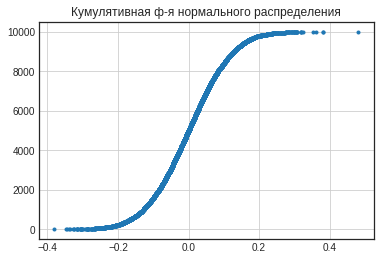

In [0]:
ecdf(normal_sample)
plt.title("Кумулятивная ф-я нормального распределения")

Text(0.5, 1.0, 'Гистограмма нормального распределения')

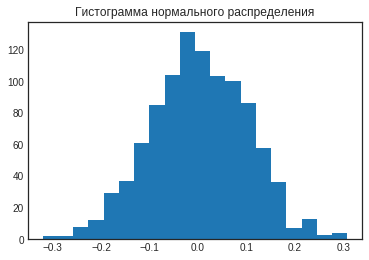

In [0]:
plt.hist(x, bins=20)
plt.title("Гистограмма нормального распределения")

# ! Не разобралась с тем, как задать случайную величину,
корректируемую через $\mu$ и $\sigma$...

In [0]:
def gauss(mu, sigma, size):
  gauss_sample = list()
  for i in range(size):
    x = np.random.random()
    gauss_sample.append((1 / (np.sqrt(2 * np.pi * np.square(sigma)))) * np.power(np.e, (-(np.square(x - mu)) / (2 * np.square(sigma)))))
  return gauss_sample

In [0]:
gauss_sample = gauss(0.5, 0.75, size)

In [0]:
np.mean(gauss_sample)

0.4946971562703414

# Распределение хи-квадрат

\- это любая статистическая проверка гипотезы... Например, мы хотим узнать, согласуются ли данные при выборке с нашей гипотезой.

Критерий хи-квадрат используется при анализе статистической значимости зависимости одного признака от другого (других): мы определённым образом считаем нужный критерий и сравниваем его с табличным критическим при нашей степени свободы. Если он больше, то эта взаимосвязь значима (вроде бы?). [Взято отсюда](http://medstatistic.ru/theory/hi_kvadrat.html)

Функция плотности вероятности распределения хи-квадрат с $k$ степенями свободы:
> $p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}
                 x^{k/2 - 1} e^{-x/2}$,

где $\Gamma$ - это гамма-функция,


> $\Gamma(x) = \int_0^{-\infty} t^{x - 1} e^{-t} dt$.

Степени свободы - это наши значимые параметры в данных, по которым они изменяются (столбцы в датасете).

Лучше построим графики с разными степенями свободы и посмотрим на них.

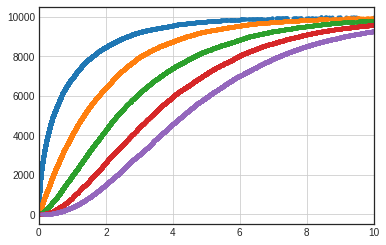

In [0]:
for k in np.arange(1, 6):
  ecdf(np.random.chisquare(k, size), lim=(0, 10))

Красиво!

# Распределение Фишера

Распределение Фишера определяется через отношение двух распределений хи квадрат и их степеней свободы:


> $F = \frac{Y_{1} / d_{1}} {Y_{2} / d_{2}}$,


где $Y_{1}, Y_{2}$ - две независимые случайные величины, имеющие распределение $\chi^2$.

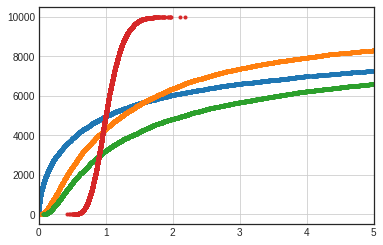

In [0]:
ecdf(np.random.f(1, 1, size=size), lim=(0, 5))
ecdf(np.random.f(5, 2, size=size), lim=(0, 5))
ecdf(np.random.f(100, 1, size=size), lim=(0, 5))
ecdf(np.random.f(100, 100, size=size), lim=(0, 5))

In [0]:
?np.random.f

Используется в статистике при сравнении средних между группами.